In [9]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.3.0


In [10]:
mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images/255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

In [11]:
print(len(set(train_labels)))

10


In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nAcc is above required.')
            self.model.stop_training = True
callback = myCallback()
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=5,callbacks=[callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4471 - accuracy: 0.8366
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2975 - accuracy: 0.8912
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2521 - accuracy: 0.9072
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2194 - accuracy: 0.9181
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1896 - accuracy: 0.9285


In [15]:
test_loss = model.evaluate(test_images, test_labels)
print(test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9058
[0.2587427794933319, 0.9057999849319458]


array([1.2703343e-09, 2.0780776e-08, 1.7996984e-09, 5.0509549e-08,
       9.6982943e-11, 1.5621604e-06, 8.6499613e-11, 8.0278332e-05,
       8.0958122e-11, 9.9991810e-01], dtype=float32)

In [42]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for x,y in enumerate(class_names):
    print(x,y)

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


7 0.98485684 Sneaker
7


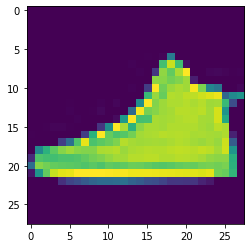

In [50]:
import matplotlib.pyplot as plt
x = np.random.randint(0,10000)
for z,y in enumerate(list(model.predict(test_images)[x])):
    max_ = max(model.predict(test_images)[x])
    if y == max_:
        print(z,y,class_names[z])
print(test_labels[x])
plt.imshow(test_images[x].reshape(28,28))